分析结果：
```
    测试和优化方案：
    测试周期：  2013.1~2023.1（10年）
    测试窗口    2年、3年、5年
    滚动窗口    3个月滚动一次，每年4个滚动
    测试数量：  8x4+7x4+5x4= 32+28+20 = 80个测试（ 剩余年数 * 年移动4次）
```

In [16]:
import pandas as pd
df = pd.read_csv("../debug/510500_20150101_20221201_2,3,5_3.csv")
df1 = df[["基金代码", "投资起始", "投资结束", "组合年化","组合收益","基准收益", "基金收益"]]
plus = df1[df['组合收益']>0]
minus = df1[df['组合收益']<0]
good = df1[df['组合收益']>df['基金收益']]
bad = df1[df['组合收益']<df['基金收益']]

print(f"一共测试了{len(df1)}个场景")
print(f"平均年化：{df['组合年化'].mean()}")
print(f"年化方差：{df['组合年化'].std()}")
print(f"最大年化：{df['组合年化'].max()}")
print(f"最小年化：{df['组合年化'].min()}")
print(f"负收益比例：{len(minus)/len(df1)}")
print(f"强于基金比例：{len(good)/len(df1)}")
print("比基金差的情况：")
print(bad)
print("年化为负的情况：")
print(minus)


一共测试了59个场景
平均年化：0.0363953564979821
年化方差：0.04534137732426247
最大年化：0.1310401541059451
最小年化：-0.1253383697950389
负收益比例：0.1016949152542373
强于基金比例：0.6949152542372882
比基金差的情况：
      基金代码      投资起始      投资结束      组合年化     组合收益率      基准收益      基金收益
15  510500  20181008  20200930  0.131040  0.279252  0.184627  0.378579
16  510500  20190102  20201231  0.050914  0.104421  0.408787  0.594791
17  510500  20190402  20210331  0.029506  0.059883  0.083445  0.122193
18  510500  20190702  20210630  0.031552  0.064100  0.179785  0.390587
19  510500  20191008  20210930  0.001385  0.002772  0.224672  0.494255
20  510500  20200102  20211231  0.000369  0.000739  0.179754  0.421718
21  510500  20200402  20220331  0.001122  0.002246  0.169589  0.276365
22  510500  20200702  20220630  0.051265  0.105157  0.099673  0.125075
39  510500  20180702  20210630  0.081977  0.266644  0.293865  0.398427
40  510500  20181008  20210930  0.085555  0.279252  0.313511  0.613343
41  510500  20190102  20211231  0.033661  0.104421

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  3.,  5.,  5.,  3.,  7.,  5., 10.,  3.,  2.,  3.,  2.,  0.,
         1.,  1.,  0.,  3.]),
 array([-0.12533837, -0.11679242, -0.10824647, -0.09970052, -0.09115457,
        -0.08260862, -0.07406267, -0.06551671, -0.05697076, -0.04842481,
        -0.03987886, -0.03133291, -0.02278696, -0.01424101, -0.00569506,
         0.00285089,  0.01139684,  0.01994279,  0.02848874,  0.0370347 ,
         0.04558065,  0.0541266 ,  0.06267255,  0.0712185 ,  0.07976445,
         0.0883104 ,  0.09685635,  0.1054023 ,  0.11394825,  0.1224942 ,
         0.13104015]),
 <BarContainer object of 30 artists>)

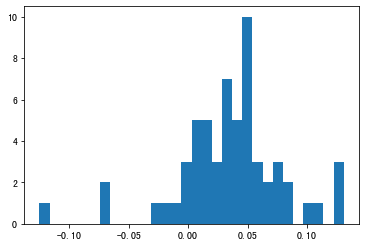

In [21]:
import matplotlib.pyplot as plt
plt.hist(df1['组合年化'],bins=30)